In [1]:
import pandas as pd
import pickle

with open('movie.pickle', 'rb') as handle:
    show_dict = pickle.load(handle)

# vote average is the percent that appears on the site.

In [2]:
show_dict['Bone']

{'adult': False,
 'backdrop_path': None,
 'genre_ids': [35],
 'id': 27012,
 'original_language': 'en',
 'original_title': 'Bone',
 'overview': 'A thief breaks into the home of a wealthy, happily married Beverly Hills couple. He soon finds out, though, that the couple is neither as wealthy as he thought they were and are not as happily married as they appeared.',
 'popularity': 1.15199,
 'poster_path': '/kQ4C3kmy5LQjVwtMEPoStQpfLyd.jpg',
 'release_date': '1972-07-01',
 'title': 'Bone',
 'video': False,
 'vote_average': 9,
 'vote_count': 3}

In [3]:
def clean_show_dict(show_dict):
    # i was too lazy when i made this original dictionary
    show_list = list(show_dict.keys())

    new_dict = dict((x, []) for x in show_dict[show_list[0]])

    for show in show_list:
        for key in new_dict.keys():
            new_dict[key].append(show_dict[show][key])

    new_dict['show_name'] = show_list
    return new_dict


show_dict = clean_show_dict(show_dict)
df = pd.DataFrame(show_dict)

In [4]:
df.head()

adult                     backdrop_path     genre_ids     id  \
0  False  /exA48ylIrchRPUSMhPFUxoLLsnH.jpg     [878, 27]  38269   
1  False  /zxcn6LN6KbwvtzGPOCMWAcedOHZ.jpg          [27]  31382   
2  False  /m9STTiP7PIxHrPkaDo8P3OKDdIw.jpg          [18]  19348   
3  False  /rGvao8CGRgtFmiJewzJxCe6cspl.jpg  [53, 28, 18]   4614   
4  False  /vyG6G5F4lcYe2qvI3tjWoskxXgZ.jpg          [18]  28696   

  original_language             original_title  \
0                en  War of the Colossal Beast   
1                en         The Touch of Satan   
2                en                  Girlfight   
3                en       The Sum of All Fears   
4                en               The Wild One   

                                            overview  popularity  \
0  Glenn Manning, "The Amazing Colosasal Man," be...    1.009095   
1  On his way to California, Jodie decides on a w...    1.000494   
2  Diana Guzman begins to train as a boxer and ac...    1.502730   
3  CIA analyst Jack Ryan discovers that an Islami...    1.536098   
4  A gang of forty motorcyclists, the Black Rebel...    1.455453   

                        poster_path release_date                  show_name  \
0  /t8iRV68Fs8npp2i4NtACfM8eqhI.jpg   1958-06-04  War of the Colossal Beast   
1  /35gOnMykpCE5OauvbLmDRtGv9V2.jpg   1971-08-23         The Touch of Satan   
2  /h9w0s4M7UAT6yMFv1Qw0Gp5qx9C.jpg   2000-05-01                  Girlfight   
3  /k3ZJrGAccBocurYccRyD3aP6ltV.jpg   2002-05-31       The Sum of All Fears   
4  /8k8rBk6TS8qrzuyRgOBbDPhP1fR.jpg   1953-12-30               The Wild One   

                       title  video  vote_average  vote_count  
0  War of the Colossal Beast  False           4.6           9  
1         The Touch of Satan  False           1.7           9  
2                  Girlfight  False           6.4          50  
3       The Sum of All Fears  False           5.9         396  
4               The Wild One  False           6.8          52

In [11]:
df[df.original_title=='Mike and the Mechanics - Live in Warburg 2011'].overview.values

array([ "Mike &amp; The Mechanics Live in Warburg 16th July 2011  01 The Road\r 02 A Beggar On A Beach Of Gold\r 03 Try To Save Me\r 04 Another Cup Of Coffee\r 05 I Don't Do Love\r 06 Follow You Follow Me\r 07 I Can't Dance\r 08 The Living Years\r 09 Over My Shoulder\r 10 All I Need Is A Miracle"], dtype=object)

In [28]:
df['overview'] = df['overview'].apply(lambda x: x.replace('\r',''))

In [29]:
df[df.original_title=='Mike and the Mechanics - Live in Warburg 2011'].overview.values

array([ "Mike &amp; The Mechanics Live in Warburg 16th July 2011  01 The Road 02 A Beggar On A Beach Of Gold 03 Try To Save Me 04 Another Cup Of Coffee 05 I Don't Do Love 06 Follow You Follow Me 07 I Can't Dance 08 The Living Years 09 Over My Shoulder 10 All I Need Is A Miracle"], dtype=object)

In [8]:
df.release_date.apply(lambda x: pd.to_datetime(x))

0       1972-07-01
1       2009-05-13
2       2016-09-09
3       1953-01-21
4       2007-06-08
5       2007-02-09
6       1998-03-06
7       2003-01-31
8       2011-03-15
9       1939-01-14
10      1982-01-22
11      1939-06-16
12      1998-05-08
13      1998-01-08
14      1947-10-07
15      1988-06-10
16      2000-05-17
17      1985-11-08
18      2002-12-13
19      2001-01-18
20      1979-02-09
21      1969-08-01
22      1978-09-29
23      1941-10-29
24      2004-09-12
25      1980-06-06
26      1994-12-05
27      2010-05-12
28      1960-05-13
29      1979-02-01
           ...    
20107   1987-11-06
20108   1987-01-01
20109   1945-12-15
20110   1983-09-30
20111   2013-06-14
20112   1964-11-12
20113   1957-04-23
20114   2000-08-11
20115   1972-09-01
20116   1958-12-17
20117   1958-08-01
20118   1944-08-15
20119   1940-01-19
20120   1974-02-11
20121   2010-10-22
20122   1996-12-14
20123   1989-01-01
20124   1984-09-07
20125   1930-04-18
20126   2014-02-14
20127   1900-11-16
20128   1981

In [6]:
df.columns

Index(['adult', 'backdrop_path', 'genre_ids', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'show_name', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [3]:
print(len(show_dict['24 '].keys()))
show_dict['24 '].keys()

13


dict_keys(['backdrop_path', 'vote_average', 'first_air_date', 'id', 'genre_ids', 'poster_path', 'original_language', 'origin_country', 'popularity', 'original_name', 'overview', 'vote_count', 'name'])

In [4]:
def clean_show_dict(show_dict):
    #i was too lazy when i made this original dictionary
    show_list = list(show_dict.keys())

    new_dict = dict((x, []) for x in show_dict[show_list[0]])

    for show in show_list:
        for key in new_dict.keys():
            new_dict[key].append(show_dict[show][key])

    new_dict['show_name'] = show_list
    return new_dict

show_dict = clean_show_dict(show_dict)

In [5]:
df = pd.DataFrame(show_dict)

In [6]:
df.shape

(1745, 14)

In [7]:
df.head()

backdrop_path first_air_date           genre_ids     id  \
0  /wCKVYyQm7pWq3GKflCMlmNzSE74.jpg     2005-12-04            [80, 18]   2409   
1  /9xdKaaAt7exvJUUDxQLGqig1BQV.jpg     2008-01-30                [99]  17655   
2  /yMy0hEckprt3rsXVXJDExKYKOud.jpg     1995-01-29  [10759, 18, 10765]   4615   
3                              None     2003-09-28                [18]   4885   
4  /iYT5w3Osv3Bg1NUZdN9UYmVatPs.jpg     1991-09-14            [16, 35]  26732   

                                      name origin_country original_language  \
0                             Sleeper Cell           [US]                en   
1                              UFO Hunters           [US]                en   
2         Hercules: The Legendary Journeys           [US]                en   
3                           The Lyon's Den           [US]                en   
4  Captain N and the New Super Mario World           [US]                en   

                             original_name  \
0                             Sleeper Cell   
1                              UFO Hunters   
2         Hercules: The Legendary Journeys   
3                           The Lyon's Den   
4  Captain N and the New Super Mario World   

                                            overview  popularity  \
0  A chilling and unflinching look at all sides o...    2.076039   
1  UFO Hunters is an American television series t...    1.006261   
2  Hercules: The Legendary Journeys is a televisi...    2.847824   
3  The Lyon's Den is a 2003 television series set...    1.579441   
4  Super Mario World is an American animated tele...    1.590575   

                        poster_path                         show_name  \
0  /ikFDATE4BuLXJYlqMd4euk5oPSK.jpg                     Sleeper Cell    
1  /6E8GPTWAiZN0eKOeJkE4iLWQAFi.jpg                    UFO Hunters _1   
2  /ayK0FP2CHrFG8CGDJ1fYgKVa5JP.jpg  Hercules: The Legendary Journeys   
3  /pC1W4ez6vPvxl74081ugZrGKhqC.jpg                    The Lyon's Den   
4  /i4Q8a0Ax5I0h6b1rHOcQEZNvJzG.jpg                Super Mario World    

   vote_average  vote_count  
0          7.28          20  
1          6.00           2  
2          6.33          56  
3          0.00           0  
4          3.50           2

In [8]:
df.first_air_date = df.first_air_date.apply(lambda x: pd.to_datetime(x))

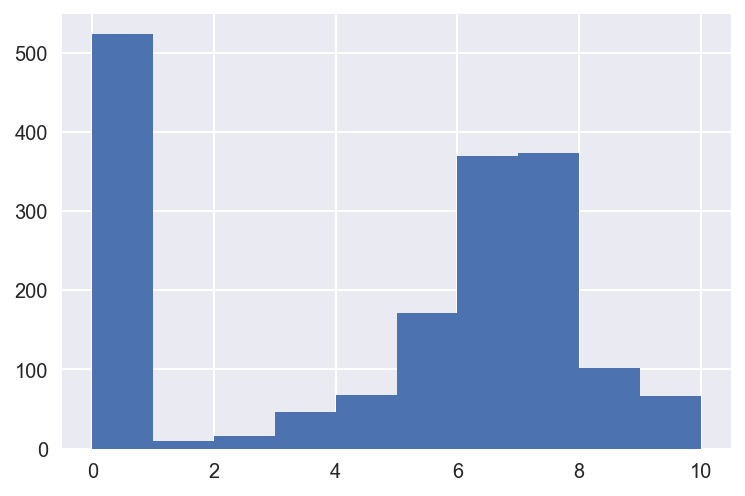

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

df.vote_average.hist();

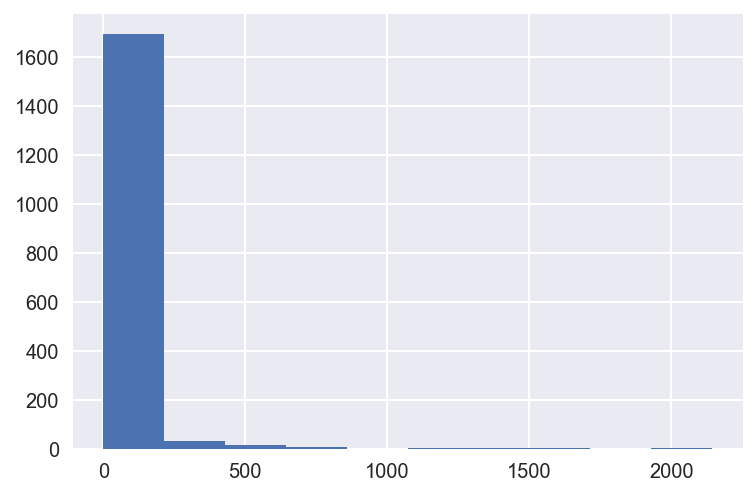

In [10]:
df.vote_count.hist();

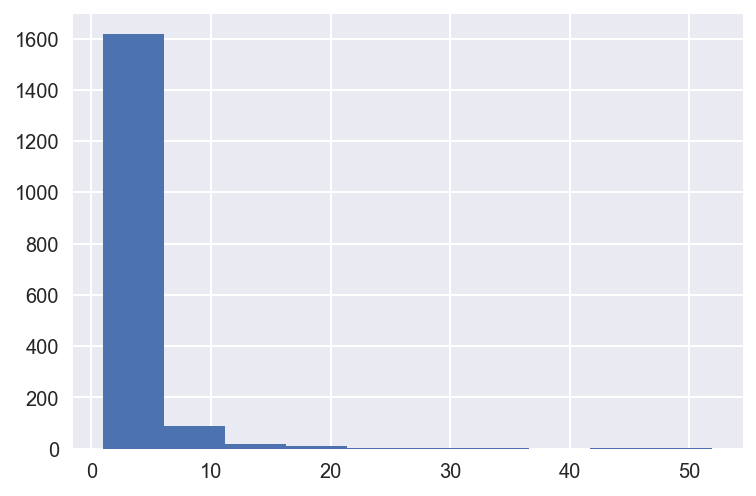

In [11]:
df.popularity.hist();

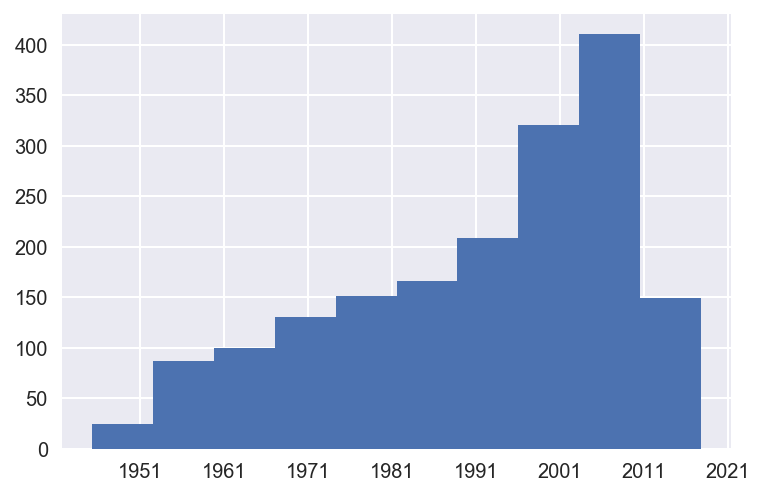

In [12]:
df.first_air_date.hist();

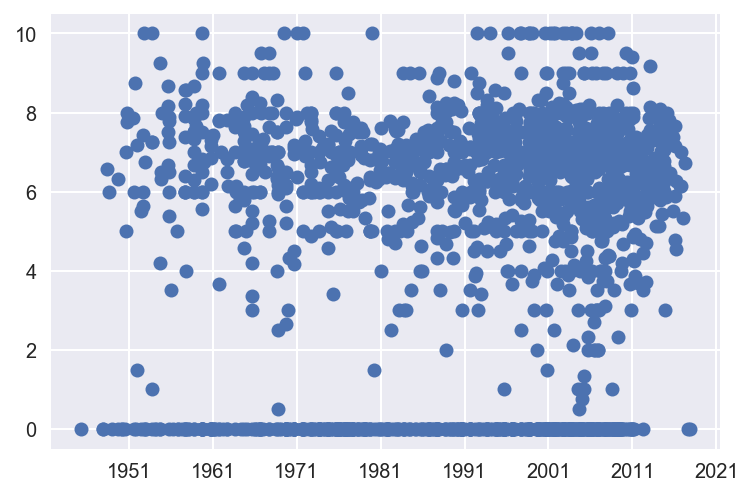

In [13]:
plt.plot(df.first_air_date, df.vote_average, 'o');

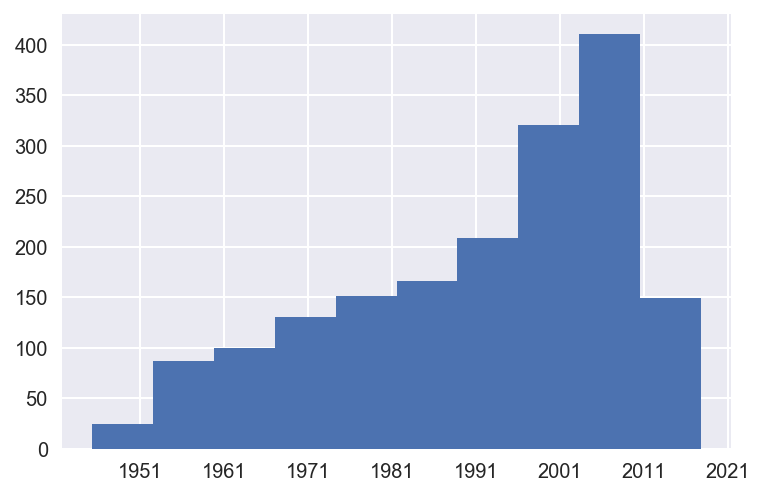

In [14]:
df.first_air_date.hist();

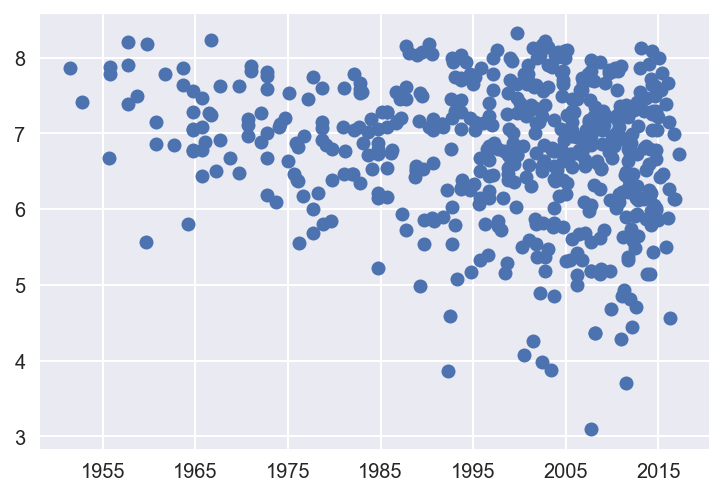

In [27]:
my_filter = df.vote_count > 10

plt.plot(df[my_filter].first_air_date, df[my_filter].vote_average, 'o');

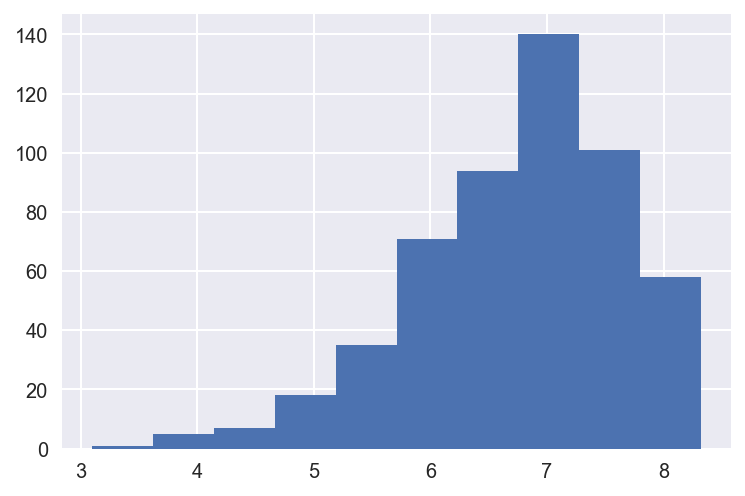

In [28]:
df[my_filter].vote_average.hist();

In [29]:
import time

df['first_air_date_unix'] = df.first_air_date.apply(lambda x: time.mktime(x.timetuple()))

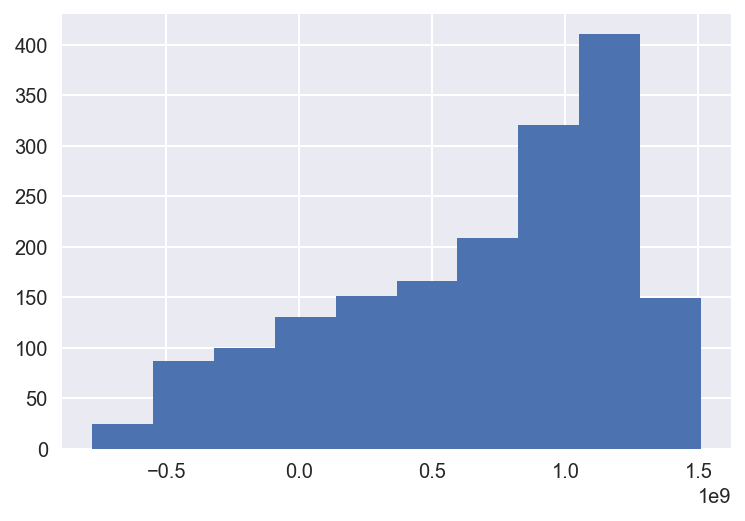

In [30]:
df.first_air_date_unix.hist();

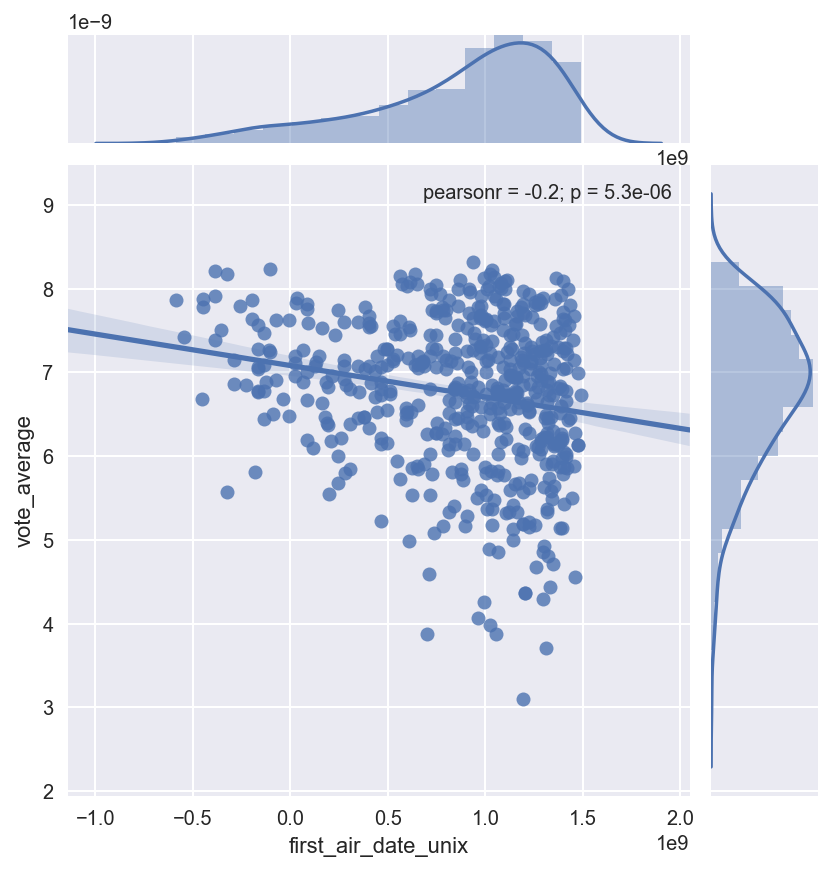

In [32]:
sns.jointplot('first_air_date_unix','vote_average', data=df[my_filter], kind='reg')

In [33]:
df.first_air_date_unix = df.first_air_date_unix+df.first_air_date_unix.min()*-1

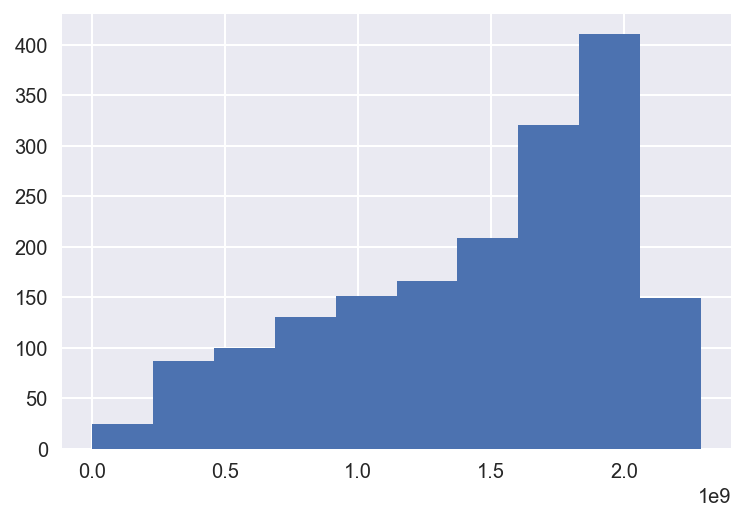

In [34]:
df.first_air_date_unix.hist();

In [35]:
from sklearn import linear_model

X = df[my_filter].first_air_date_unix.values
y = df[my_filter].vote_average.values

lr = linear_model.LinearRegression()
lr.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
lr.score(X.reshape(-1,1),y.reshape(-1,1))

0.038528573017108547

In [37]:
lr.coef_

array([[ -3.75454395e-10]])